In [5]:
import arff
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from operator import attrgetter, itemgetter
from io import StringIO
from sklearn.model_selection import train_test_split
import nltk
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import make_scorer, confusion_matrix,classification_report,precision_recall_fscore_support as score, average_precision_score
from sklearn import metrics
from sklearn.model_selection import cross_validate

## training model
from sklearn.linear_model import SGDClassifier

import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

# Importing dataset

In [6]:
data = arff.load(open('../OffComBR3.arff'))
df = pd.DataFrame(data['data'])
df.columns = ['hate', 'sentence']

# transforming 'yes' into 1 and 'no' into 0
df['hate'] = df['hate'].apply(lambda x: 1 if x == 'yes' else 0)

X = df['sentence'].tolist()
y = df['hate'].tolist()
X_train, X_test, y_train, y_test = train_test_split(
                                    X, y, test_size=0.33, random_state=42)

In [3]:
cl =  Pipeline([
        ('tfidf',TfidfVectorizer()),
        ('clf', SGDClassifier()),
        ])

In [4]:
cl.fit(X_train, y_train)
pred = cl.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.82      0.94      0.88       267
           1       0.57      0.27      0.37        74

   micro avg       0.80      0.80      0.80       341
   macro avg       0.70      0.61      0.62       341
weighted avg       0.77      0.80      0.77       341



/home/marco/tcc/env_tcc/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


In [4]:
nltk.download('stopwords')
nltk.download('rslp')
stopwords = nltk.corpus.stopwords.words('portuguese')
stemmer = nltk.stem.RSLPStemmer()
nltk.download('punkt')


def clean_text(txt):
    text = ''
    for w in nltk.word_tokenize(txt):
        if w not in stopwords:
            text = text + stemmer.stem(w) + ' '
    return text.strip()

[nltk_data] Downloading package stopwords to /home/marco/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to /home/marco/nltk_data...
[nltk_data]   Package rslp is already up-to-date!
[nltk_data] Downloading package punkt to /home/marco/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [5]:
## Cleaning text before

for i in range(len(X_train)):
    n_txt = clean_text(X_train[i])
    X_train[i] = n_txt
    
for i in range(len(X_test)):
    n_txt = clean_text(X_test[i])
    X_test[i] = n_txt

In [7]:
cl.fit(X_train, y_train)
pred = cl.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.84      0.93      0.88       267
           1       0.60      0.36      0.45        74

   micro avg       0.81      0.81      0.81       341
   macro avg       0.72      0.65      0.67       341
weighted avg       0.79      0.81      0.79       341



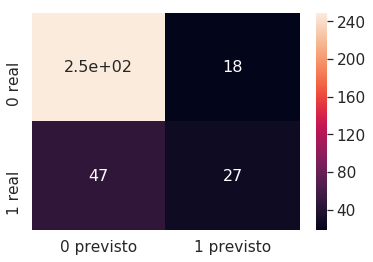

In [29]:
cm = confusion_matrix(y_test, pred)
df_cm = pd.DataFrame(cm, ('0 real', '1 real'), ('0 previsto', '1 previsto'))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size

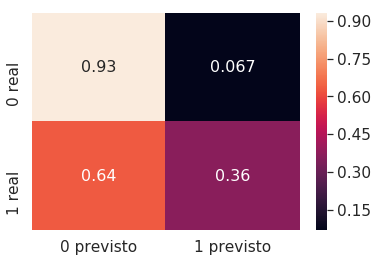

In [33]:
cm = confusion_matrix(y_test, pred)/ [[267,267],[74,74]] # deviding it by its real count so we can get the percentage
df_cm = pd.DataFrame(cm, ('0 real', '1 real'), ('0 previsto', '1 previsto'))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size

## Grid tests with dynamic parameters

### Tests with accuracy as scoring paramether

In [16]:
## Teste com accuracy

parameters = {'tfidf__ngram_range': [(1,1), (1,2), (1,3), (1,4)],
              'clf__alpha': (1, 1e-2),
              'clf__loss': ('hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'),
              'clf__penalty': ('none', 'l2', 'l1','elasticnet')
             }

gs_clf = GridSearchCV(cl, parameters, cv=5, iid=False, n_jobs=-1, scoring='accuracy')
# iidd: "If True, return the average score across folds, weighted by the number of samples"
# cv: Number of folds
# n_jobs: -1 means using all processors
# scoring: 'balanced accuracy is the average of recall obtained on each class.'

gs_clf.fit(X_train, y_train)
print(gs_clf.best_score_)
print(gs_clf.best_params_)

0.8468221043603075
{'clf__alpha': 0.01, 'clf__loss': 'squared_hinge', 'clf__penalty': 'none', 'tfidf__ngram_range': (1, 4)}


/home/marco/tcc/env_tcc/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


In [21]:
cl_enhanced =  Pipeline([
        ('tfidf',TfidfVectorizer(ngram_range=(1,4))),
        ('clf', SGDClassifier(alpha=0.01, loss='squared_hinge', penalty='none')),
        ])
cl_enhanced.fit(X_train, y_train)
pred = cl_enhanced.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.81      0.97      0.89       267
           1       0.67      0.19      0.29        74

   micro avg       0.80      0.80      0.80       341
   macro avg       0.74      0.58      0.59       341
weighted avg       0.78      0.80      0.76       341



### Tests with f1_macro as scoring paramether

In [14]:
parameters = {'tfidf__ngram_range': [(1,1), (1,2), (1,3), (1,4)],
              'clf__alpha': (1, 1e-2),
              'clf__loss': ('hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'),
              'clf__penalty': ('none', 'l2', 'l1','elasticnet')
             }

gs_clf = GridSearchCV(cl, parameters, cv=5, iid=False, n_jobs=-1, scoring='f1_macro')

gs_clf.fit(X_train, y_train)
print(gs_clf.best_score_)
print(gs_clf.best_params_)

0.6849917499152081
{'clf__alpha': 0.01, 'clf__loss': 'modified_huber', 'clf__penalty': 'none', 'tfidf__ngram_range': (1, 1)}


/home/marco/tcc/env_tcc/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


In [22]:
cl_enhanced =  Pipeline([
        ('tfidf',TfidfVectorizer(ngram_range=(1,1))),
        ('clf', SGDClassifier(alpha=0.01, loss='modified_huber', penalty='none')),
        ])
cl_enhanced.fit(X_train, y_train)
pred = cl_enhanced.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.86       267
           1       0.48      0.31      0.38        74

   micro avg       0.78      0.78      0.78       341
   macro avg       0.65      0.61      0.62       341
weighted avg       0.75      0.78      0.76       341



### Tests with precision as scoring paramether

In [17]:
parameters = {'tfidf__ngram_range': [(1,1), (1,2), (1,3), (1,4)],
              'clf__alpha': (1, 1e-2),
              'clf__loss': ('hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'),
              'clf__penalty': ('none', 'l2', 'l1','elasticnet')
             }

gs_clf = GridSearchCV(cl, parameters, cv=5, iid=False, n_jobs=-1, scoring='precision')

gs_clf.fit(X_train, y_train)
print(gs_clf.best_score_)
print(gs_clf.best_params_)

1.0
{'clf__alpha': 0.01, 'clf__loss': 'modified_huber', 'clf__penalty': 'l2', 'tfidf__ngram_range': (1, 1)}


/home/marco/tcc/env_tcc/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


In [23]:
cl_enhanced =  Pipeline([
        ('tfidf',TfidfVectorizer(ngram_range=(1,1))),
        ('clf', SGDClassifier(alpha=0.01, loss='modified_huber', penalty='l2')),
        ])
cl_enhanced.fit(X_train, y_train)
pred = cl_enhanced.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88       267
           1       0.75      0.04      0.08        74

   micro avg       0.79      0.79      0.79       341
   macro avg       0.77      0.52      0.48       341
weighted avg       0.78      0.79      0.71       341



### Tests with recall as scoring paramether

In [18]:
parameters = {'tfidf__ngram_range': [(1,1), (1,2), (1,3), (1,4)],
              'clf__alpha': (1, 1e-2),
              'clf__loss': ('hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'),
              'clf__penalty': ('none', 'l2', 'l1','elasticnet')
             }

gs_clf = GridSearchCV(cl, parameters, cv=5, iid=False, n_jobs=-1, scoring='recall')

gs_clf.fit(X_train, y_train)
print(gs_clf.best_score_)
print(gs_clf.best_params_)

0.5393846153846155
{'clf__alpha': 0.01, 'clf__loss': 'perceptron', 'clf__penalty': 'none', 'tfidf__ngram_range': (1, 3)}


/home/marco/tcc/env_tcc/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


In [24]:
cl_enhanced =  Pipeline([
        ('tfidf',TfidfVectorizer(ngram_range=(1,3))),
        ('clf', SGDClassifier(alpha=0.01, loss='perceptron', penalty='none')),
        ])
cl_enhanced.fit(X_train, y_train)
pred = cl_enhanced.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84       267
           1       0.43      0.50      0.46        74

   micro avg       0.75      0.75      0.75       341
   macro avg       0.64      0.66      0.65       341
weighted avg       0.76      0.75      0.75       341



## Usign K-FoldCV

In [8]:
def get_recal_1(y_true, y_pred):
    precision, recall, fscore, support = score(y_true, y_pred)
    print(classification_report(y_true, y_pred))
    return(recall[1])

## Fase 0

In [55]:
data = arff.load(open('../OffComBR3.arff'))
df = pd.DataFrame(data['data'])
df.columns = ['hate', 'sentence']

# transforming 'yes' into 1 and 'no' into 0
df['hate'] = df['hate'].apply(lambda x: 1 if x == 'yes' else 0)

X = df['sentence'].tolist()
y = df['hate'].tolist()

cl =  Pipeline([
        ('tfidf',TfidfVectorizer()),
        ('clf', SGDClassifier()),
        ])

scores = cross_validate(cl, X, y,
                        cv=5, return_train_score=False, scoring=make_scorer(get_recal_1))

              precision    recall  f1-score   support

           0       0.83      0.97      0.90       167
           1       0.62      0.20      0.30        41

   micro avg       0.82      0.82      0.82       208
   macro avg       0.72      0.58      0.60       208
weighted avg       0.79      0.82      0.78       208

              precision    recall  f1-score   support

           0       0.88      0.93      0.90       166
           1       0.63      0.46      0.54        41

   micro avg       0.84      0.84      0.84       207
   macro avg       0.75      0.70      0.72       207
weighted avg       0.83      0.84      0.83       207

              precision    recall  f1-score   support

           0       0.84      0.95      0.89       166
           1       0.53      0.23      0.32        40

   micro avg       0.81      0.81      0.81       206
   macro avg       0.68      0.59      0.60       206
weighted avg       0.78      0.81      0.78       206

              preci

/home/marco/tcc/env_tcc/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


## Fase 1

In [10]:
data = arff.load(open('../OffComBR3.arff'))
df = pd.DataFrame(data['data'])
df.columns = ['hate', 'sentence']

# transforming 'yes' into 1 and 'no' into 0
df['hate'] = df['hate'].apply(lambda x: 1 if x == 'yes' else 0)

X = df['sentence'].tolist()
y = df['hate'].tolist()

## Cleaning text before

for i in range(len(X)):
    n_txt = clean_text(X[i])
    X[i] = n_txt
    
cl =  Pipeline([
        ('tfidf',TfidfVectorizer()),
        ('clf', SGDClassifier()),
        ])

scores = cross_validate(cl, X, y,
                        cv=5, return_train_score=False, scoring=make_scorer(get_recal_1))

              precision    recall  f1-score   support

           0       0.84      0.96      0.89       167
           1       0.59      0.24      0.34        41

   micro avg       0.82      0.82      0.82       208
   macro avg       0.71      0.60      0.62       208
weighted avg       0.79      0.82      0.79       208

              precision    recall  f1-score   support

           0       0.86      0.92      0.89       166
           1       0.53      0.39      0.45        41

   micro avg       0.81      0.81      0.81       207
   macro avg       0.70      0.65      0.67       207
weighted avg       0.79      0.81      0.80       207

              precision    recall  f1-score   support

           0       0.88      0.93      0.90       166
           1       0.60      0.45      0.51        40

   micro avg       0.83      0.83      0.83       206
   macro avg       0.74      0.69      0.71       206
weighted avg       0.82      0.83      0.83       206

              preci

/home/marco/tcc/env_tcc/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


## Fase 2

In [11]:
data = arff.load(open('../OffComBR3.arff'))
df = pd.DataFrame(data['data'])
df.columns = ['hate', 'sentence']

# transforming 'yes' into 1 and 'no' into 0
df['hate'] = df['hate'].apply(lambda x: 1 if x == 'yes' else 0)

X = df['sentence'].tolist()
y = df['hate'].tolist()

## Cleaning text before

for i in range(len(X)):
    n_txt = clean_text(X[i])
    X[i] = n_txt
    
cl =  Pipeline([
        ('tfidf',TfidfVectorizer(ngram_range=(1,3))),
        ('clf', SGDClassifier(alpha=0.01, loss='perceptron', penalty='none')),
        ])

scores = cross_validate(cl, X, y,
                        cv=5, return_train_score=False, scoring=make_scorer(get_recal_1))

/home/marco/tcc/env_tcc/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.83      0.90      0.86       167
           1       0.39      0.27      0.32        41

   micro avg       0.77      0.77      0.77       208
   macro avg       0.61      0.58      0.59       208
weighted avg       0.75      0.77      0.76       208

              precision    recall  f1-score   support

           0       0.85      0.76      0.80       166
           1       0.32      0.46      0.38        41

   micro avg       0.70      0.70      0.70       207
   macro avg       0.59      0.61      0.59       207
weighted avg       0.75      0.70      0.72       207

              precision    recall  f1-score   support

           0       0.84      0.78      0.81       166
           1       0.31      0.40      0.35        40

   micro avg       0.71      0.71      0.71       206
   macro avg       0.58      0.59      0.58       206
weighted avg       0.74      0.71      0.72       206

              preci